In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedosamaalishah092
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset


100%|██████████| 1.19G/1.19G [01:16<00:00, 16.7MB/s]


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# v1
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

# v3
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import LearningRateScheduler
from keras.metrics import *
# v4

ACCURACY_LIST = []
from keras.applications.resnet50 import ResNet50
from keras.layers import GlobalMaxPooling2D
from keras.models import Model

# v5
!pip install efficientnet
from efficientnet.keras import EfficientNetB4
from keras import backend as K

# v6
# Get reproducible results
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(1)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00


In [5]:
metadata = pd.read_csv('/content/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')
summary = pd.read_csv('/content/coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv')

metadata.sample(10)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
4519,4519,person692_bacteria_2589.jpeg,Pnemonia,TRAIN,NaN,bacteria
3147,3147,person325_bacteria_1500.jpeg,Pnemonia,TRAIN,NaN,bacteria
3037,3037,person1945_bacteria_4872.jpeg,Pnemonia,TRAIN,NaN,bacteria
712,712,NORMAL2-IM-0490-0001.jpeg,Normal,TRAIN,NaN,NaN
5411,5434,NORMAL2-IM-0288-0001.jpeg,Normal,TEST,NaN,NaN
2126,2126,person1423_bacteria_3650.jpeg,Pnemonia,TRAIN,NaN,bacteria
5065,5065,person973_virus_1647.jpeg,Pnemonia,TRAIN,NaN,Virus
2639,2639,person1517_bacteria_3968.jpeg,Pnemonia,TRAIN,NaN,bacteria
3821,3821,person413_bacteria_1831.jpeg,Pnemonia,TRAIN,NaN,bacteria
416,416,IM-0616-0001.jpeg,Normal,TRAIN,NaN,NaN


In [6]:
train_data = metadata[metadata['Dataset_type'] == 'TRAIN']
test_data = metadata[metadata['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == metadata.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5675,5698,person112_bacteria_539.jpeg,Pnemonia,TEST,NaN,bacteria
5807,5830,person49_virus_101.jpeg,Pnemonia,TEST,NaN,Virus
5455,5478,NORMAL2-IM-0195-0001.jpeg,Normal,TEST,NaN,NaN
5609,5632,person134_bacteria_644.jpeg,Pnemonia,TEST,NaN,bacteria
5798,5821,person57_virus_113.jpeg,Pnemonia,TEST,NaN,Virus
5597,5620,person139_bacteria_661.jpeg,Pnemonia,TEST,NaN,bacteria
5895,5918,person1650_virus_2854.jpeg,Pnemonia,TEST,NaN,Virus
5671,5694,person113_bacteria_543.jpeg,Pnemonia,TEST,NaN,bacteria
5590,5613,person140_bacteria_668.jpeg,Pnemonia,TEST,NaN,bacteria
5869,5892,person1678_virus_2895.jpeg,Pnemonia,TEST,NaN,Virus


In [7]:
# Null value calculation
print(f"Count of null values in train :\n{train_data.isnull().sum()}")
print(f"Count of null values in test :\n{test_data.isnull().sum()}")

Count of null values in train :
Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5217
Label_1_Virus_category    1342
dtype: int64
Count of null values in test :
Unnamed: 0                  0
X_ray_image_name            0
Label                       0
Dataset_type                0
Label_2_Virus_category    624
Label_1_Virus_category    234
dtype: int64


In [8]:
# Substitute null values with string unknown
train_fill = train_data.fillna('unknown')
test_fill = test_data.fillna('unknown')

train_fill.sample(10)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
4724,4724,person605_virus_1169.jpeg,Pnemonia,TRAIN,unknown,Virus
991,991,NORMAL2-IM-0978-0001.jpeg,Normal,TRAIN,unknown,unknown
1601,1601,person1040_bacteria_2974.jpeg,Pnemonia,TRAIN,unknown,bacteria
428,428,IM-0606-0001.jpeg,Normal,TRAIN,unknown,unknown
2080,2080,person1271_bacteria_3231.jpeg,Pnemonia,TRAIN,unknown,bacteria
4768,4768,person870_bacteria_2792.jpeg,Pnemonia,TRAIN,unknown,bacteria
4352,4352,person549_bacteria_2305.jpeg,Pnemonia,TRAIN,unknown,bacteria
2690,2690,person1720_bacteria_4545.jpeg,Pnemonia,TRAIN,unknown,bacteria
2914,2914,person265_bacteria_1236.jpeg,Pnemonia,TRAIN,unknown,bacteria
3971,3971,person502_bacteria_2122.jpeg,Pnemonia,TRAIN,unknown,bacteria


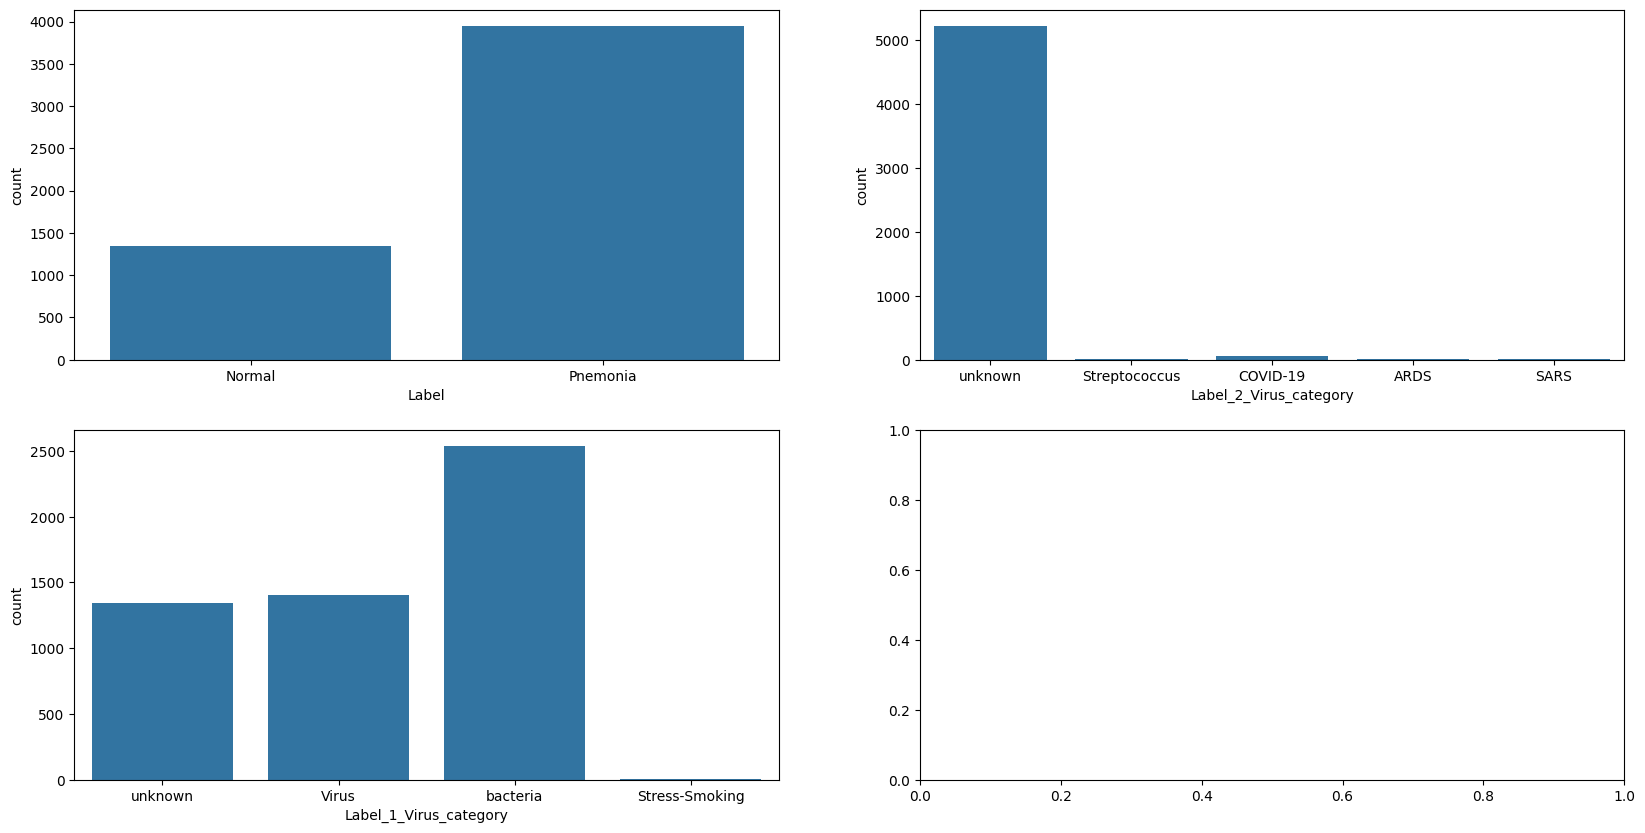

In [9]:
# Count plot for 3 attributes with unknown variable addition
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x=targets[0], data=train_fill, ax=ax[0, 0])
sns.countplot(x=targets[1], data=train_fill, ax=ax[0, 1])
sns.countplot(x=targets[2], data=train_fill, ax=ax[1, 0])
plt.show()

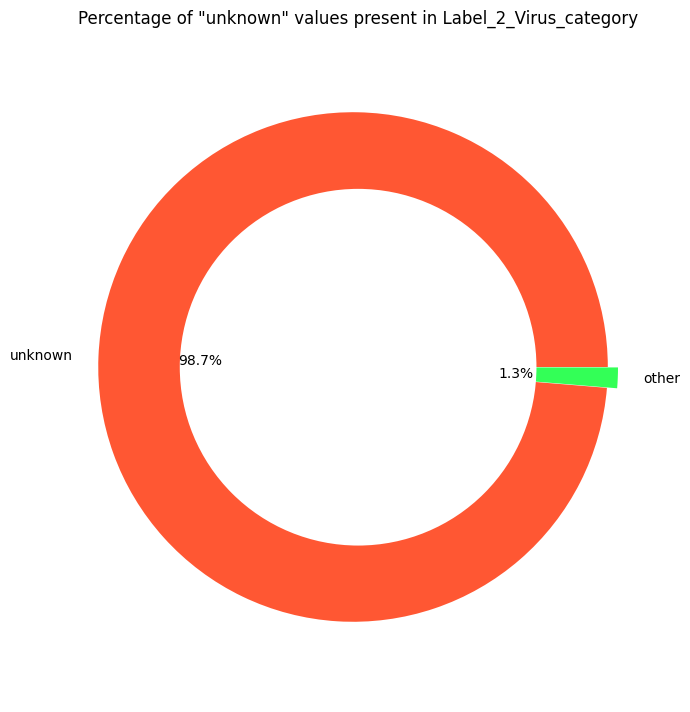

In [10]:
# Pie chart representation of Label_2_Virus_category values

colors = ['#ff5733', '#33ff57']
explode = [0.02, 0.02]

values = ['unknown', 'other']
percentages = [100 * (train_fill[train_fill[targets[1]] == 'unknown'].shape[0]) / train_fill.shape[0],
              100 * (train_fill[train_fill[targets[1]] != 'unknown'].shape[0]) / train_fill.shape[0]]

fig1, ax1 = plt.subplots(figsize=(7, 7))

plt.pie(percentages, colors=colors, labels=values,
        autopct='%1.1f%%', startangle=0, explode=explode)
fig = plt.gcf()
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.tight_layout()
plt.title('Percentage of "unknown" values present in Label_2_Virus_category')
plt.show()


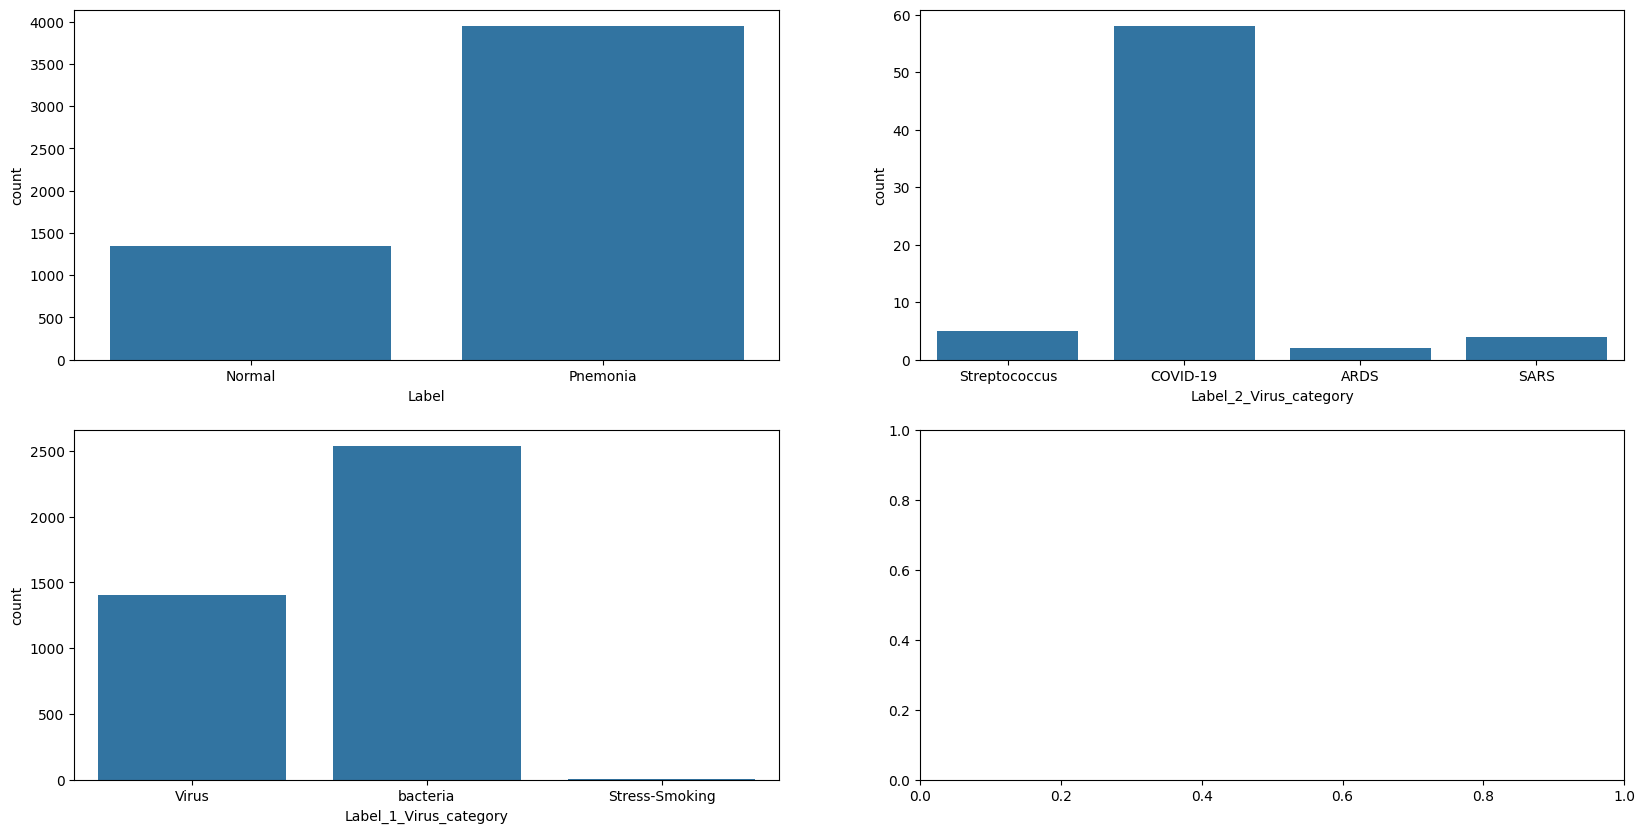

In [11]:
# Count plot for 3 target variables without filling unknown variable
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x=targets[0], data=train_data, ax=ax[0, 0])
sns.countplot(x=targets[1], data=train_data, ax=ax[0, 1])
sns.countplot(x=targets[2], data=train_data, ax=ax[1, 0])
plt.show()

In [12]:
print(f"Label = Normal Cases : {train_data[train_data['Label'] == 'Normal'].shape[0]}")
print(f"""Label = Pnemonia + Label_2_Virus_category = COVID-19 cases : {train_data[(train_data['Label'] == 'Pnemonia')
      & (train_data['Label_2_Virus_category'] == 'COVID-19')].shape[0]}""")
print(f"""Label = Normal + Label_2_Virus_category = COVID-19 cases : {train_data[(train_data['Label'] == 'Normal')
      & (train_data['Label_2_Virus_category'] == 'COVID-19')].shape[0]}""")

Label = Normal Cases : 1342
Label = Pnemonia + Label_2_Virus_category = COVID-19 cases : 58
Label = Normal + Label_2_Virus_category = COVID-19 cases : 0


In [13]:
TEST_FOLDER = '/content/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
TRAIN_FOLDER = '/content/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

assert os.path.isdir(TEST_FOLDER) == True
assert os.path.isdir(TRAIN_FOLDER) == True

In [14]:
sample_train_images = list(os.walk(TRAIN_FOLDER))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_train_images))

sample_test_images = list(os.walk(TEST_FOLDER))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(TEST_FOLDER, x), sample_test_images))

In [15]:
# Plot sample training images
plt.figure(figsize=(20, 20))

for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4, 2, iterator+1)
    plt.axis('off')
    plt.imshow(image)


plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# Plot sample testing images
plt.figure(figsize=(20, 20))

for iterator, filename in enumerate(sample_test_images):
    image = Image.open(filename)
    plt.subplot(4, 2, iterator+1)
    plt.axis('off')
    plt.imshow(image)


plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

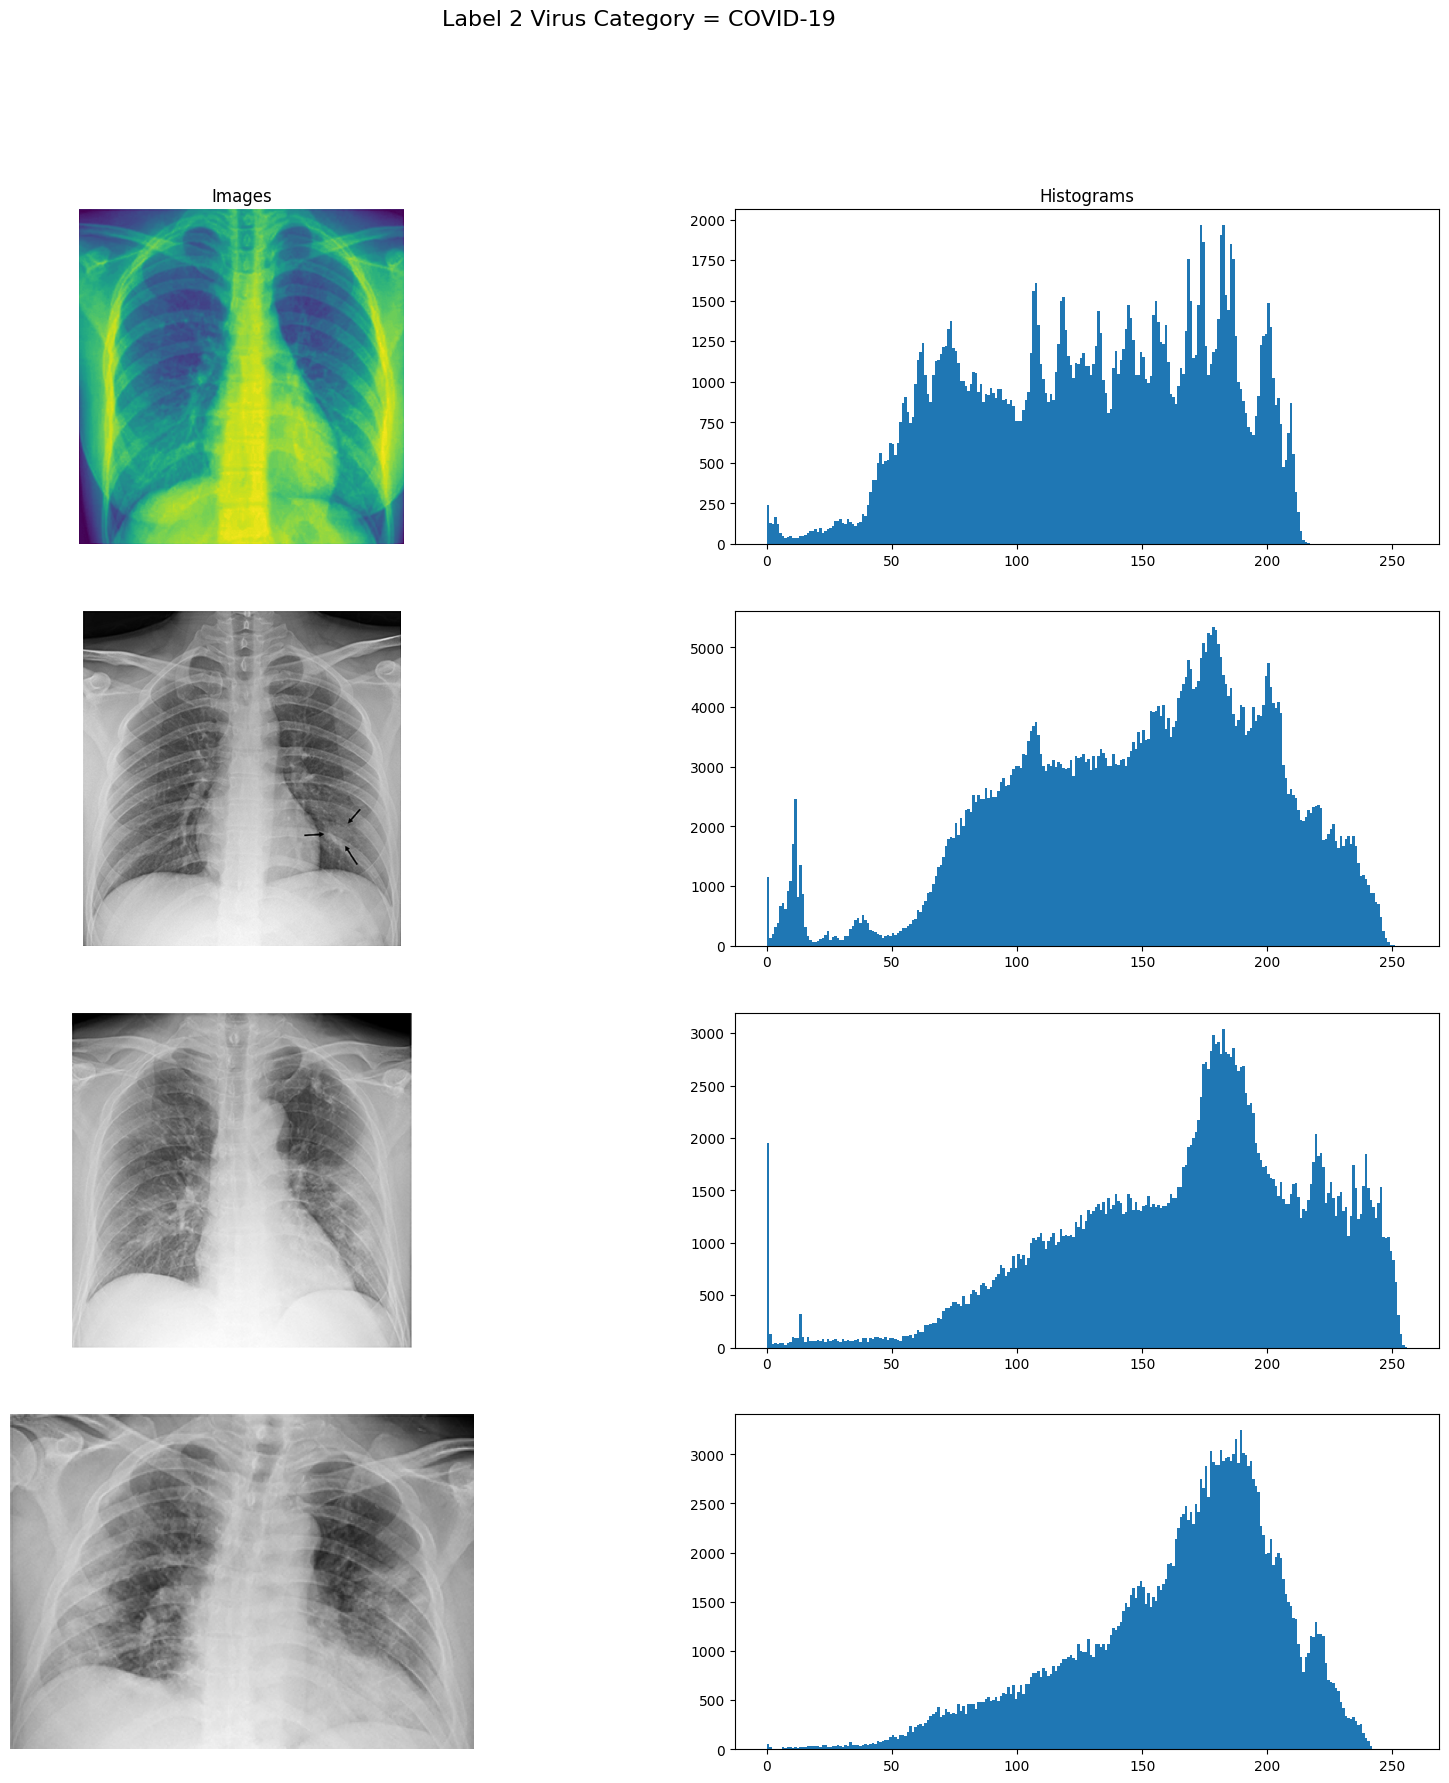

In [17]:
# Plot b/w image histograms of Label_2_Virus_category type "COVID-19" patients
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

covid19_type_file_paths = train_data[train_data['Label_2_Virus_category'] == 'COVID-19']['X_ray_image_name'].values
sample_covid19_file_paths = covid19_type_file_paths[:4]
sample_covid19_file_paths = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_covid19_file_paths))

for row, file_path in enumerate(sample_covid19_file_paths):
    image = plt.imread(file_path)
    ax[row, 0].imshow(image)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label 2 Virus Category = COVID-19', size=16)
plt.show()

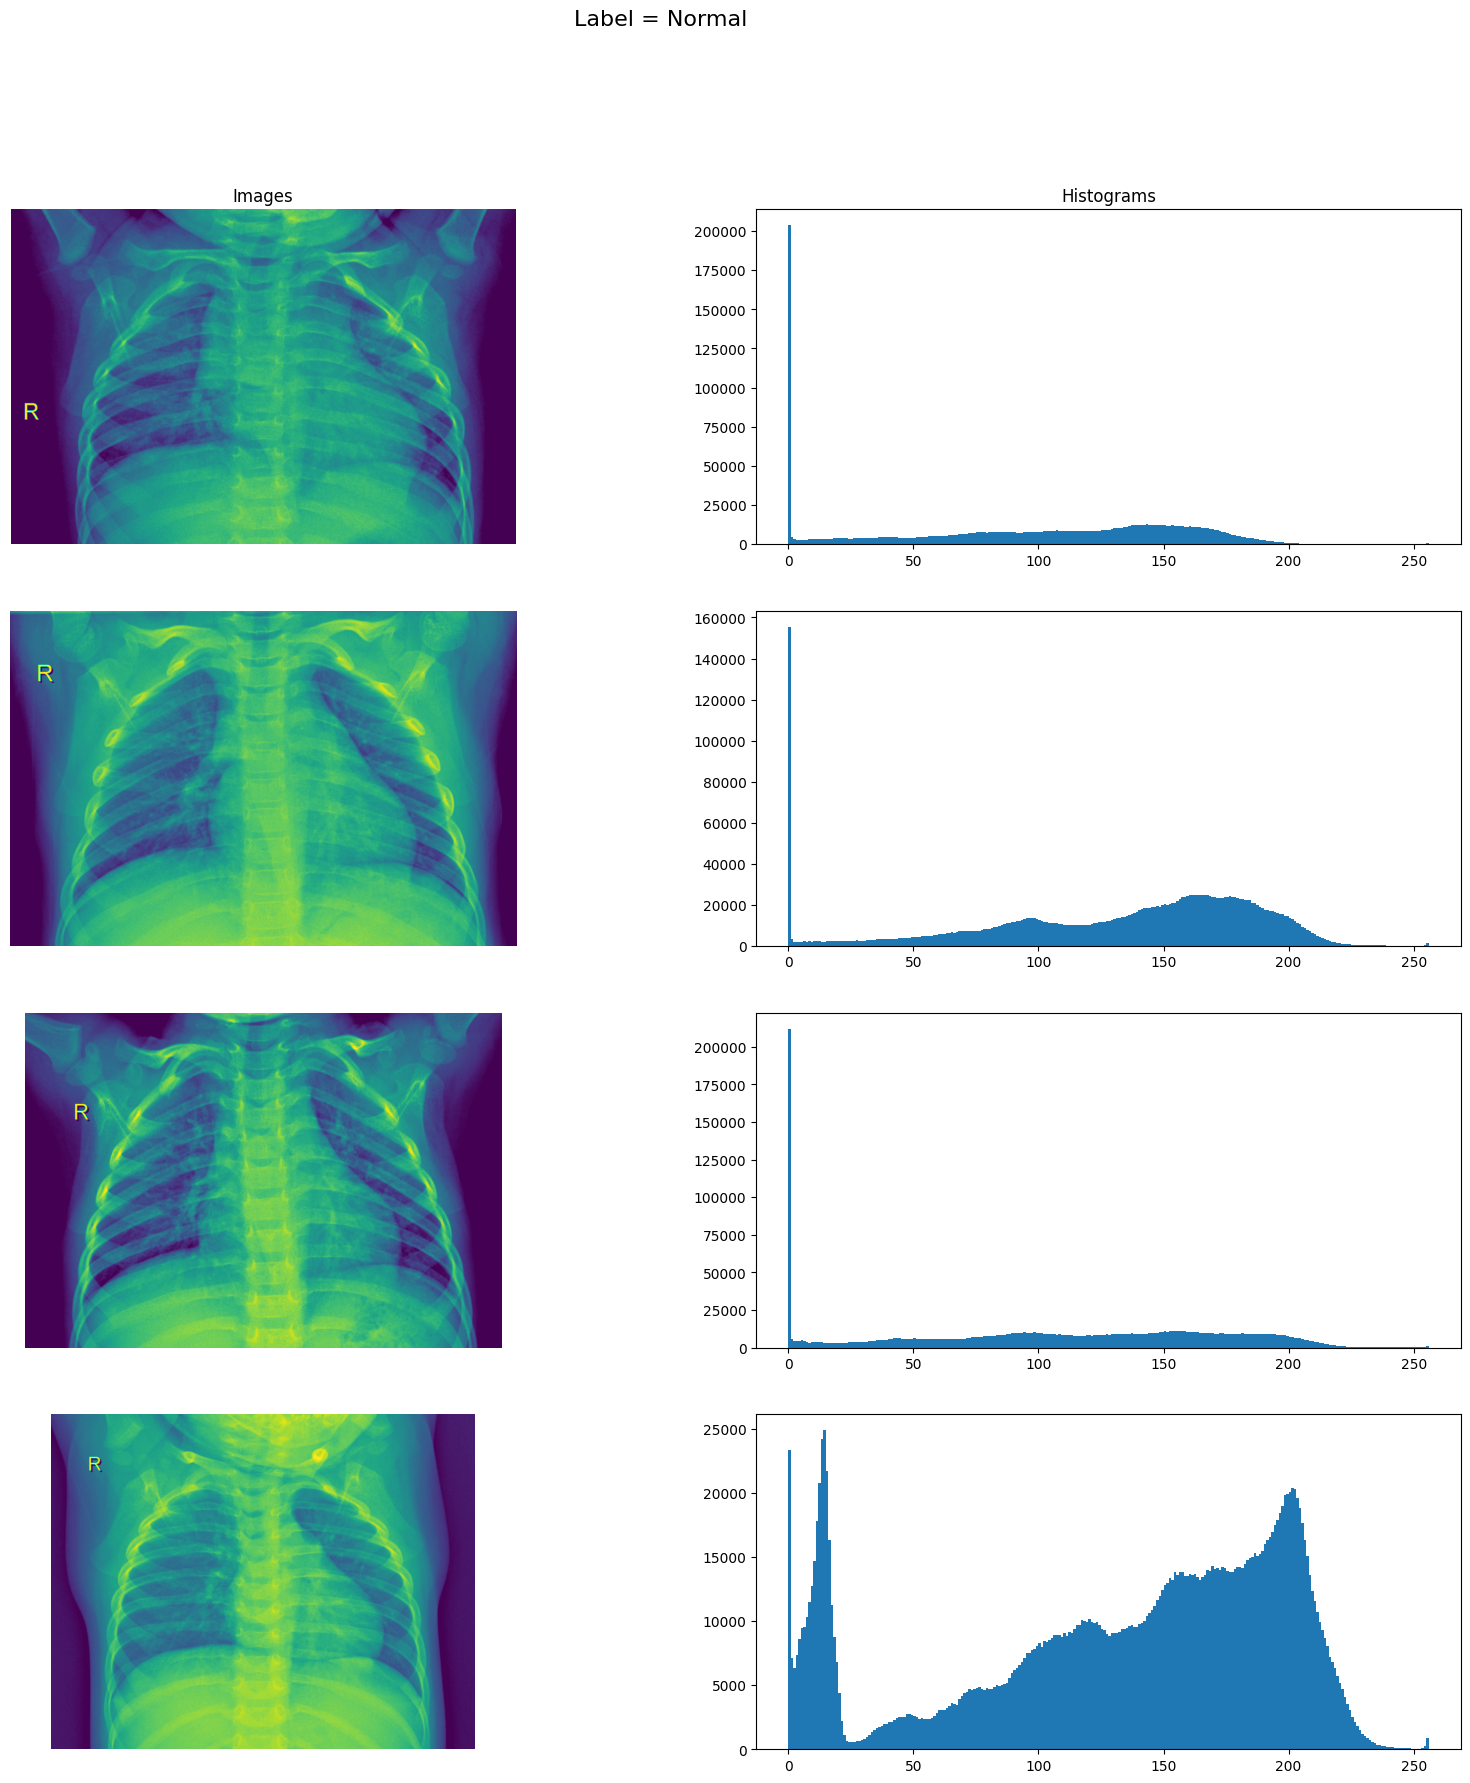

In [18]:
# Plot b/w image histograms of Label type "Normal" patients
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

other_type_file_paths = train_data[train_data['Label'] == 'Normal']['X_ray_image_name'].values
sample_other_file_paths = other_type_file_paths[:4]
sample_other_file_paths = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_other_file_paths))

for row, file_path in enumerate(sample_other_file_paths):
    image = plt.imread(file_path)
    ax[row, 0].imshow(image)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = Normal', size=16)
plt.show()

In [19]:
# Generate the final train data from original train data with conditions refered from EDA inference
final_train_data = train_data[(train_data['Label'] == 'Normal') |
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]


# Create a target attribute where value = positive if 'Pnemonia + COVID-19' or value = negative if 'Normal'
final_train_data['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in final_train_data['Label']]

final_train_data = shuffle(final_train_data, random_state=1)

final_validation_data = final_train_data.iloc[1000:, :]
final_train_data = final_train_data.iloc[:1000, :]

print(f"Final train data shape : {final_train_data.shape}")
final_train_data.sample(10)

Final train data shape : (1000, 7)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,target
649,649,NORMAL2-IM-0486-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
663,663,NORMAL2-IM-0465-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
297,297,IM-0493-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
33,33,IM-0140-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1232,1232,NORMAL2-IM-1231-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1322,1322,NORMAL2-IM-1349-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1124,1124,NORMAL2-IM-1126-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1268,1268,NORMAL2-IM-1266-0001-0002.jpeg,Normal,TRAIN,NaN,NaN,negative
90,90,IM-0268-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
19,19,IM-0166-0001.jpeg,Normal,TRAIN,NaN,NaN,negative


In [20]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=[0.9, 1.25],
    brightness_range=[0.5, 1.5]
)

test_image_generator = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_train_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,

    class_mode='binary'
)

validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_validation_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

test_generator = test_image_generator.flow_from_dataframe(
    dataframe=test_data,
    directory=TEST_FOLDER,
    x_col='X_ray_image_name',
    target_size=(224, 224),
    shuffle=False,
    batch_size=16,
    class_mode=None
)

Found 1000 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 624 validated image filenames.


In [21]:
def scheduler(epoch):
    if epoch < 5:
        return 0.0001
    else:
        print(f"Learning rate reduced to {0.0001 * np.exp(0.5 * (5 - epoch))}")
        return 0.0001 * np.exp(0.5 * (5 - epoch))

custom_callback = LearningRateScheduler(scheduler)

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'),
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

In [22]:
model = Sequential([
    Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss=binary_crossentropy,
             metrics=METRICS)

In [23]:
history = model.fit_generator(train_generator,
                   validation_data=validation_generator,
                   epochs=20,
                   callbacks=[custom_callback])

Epoch 1/20
125/125 [==============================] - 47s 319ms/step - loss: 0.2346 - tp: 0.0000e+00 - fp: 4.0000 - tn: 961.0000 - fn: 35.0000 - accuracy: 0.9610 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5877 - val_loss: 0.2265 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5938 - lr: 1.0000e-04
Epoch 2/20
125/125 [==============================] - 40s 316ms/step - loss: 0.1745 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 965.0000 - fn: 35.0000 - accuracy: 0.9650 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6060 - val_loss: 0.2272 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5553 - lr: 1.0000e-04
Epoch 3/20
125/125 [==============================] - 40s 318ms/step - loss: 0.1842 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 965.0000 - f

In [24]:
model.save('covid19_xray_base_cnn_model.h5')
ACCURACY_LIST.append(['Base CNN Model', history])

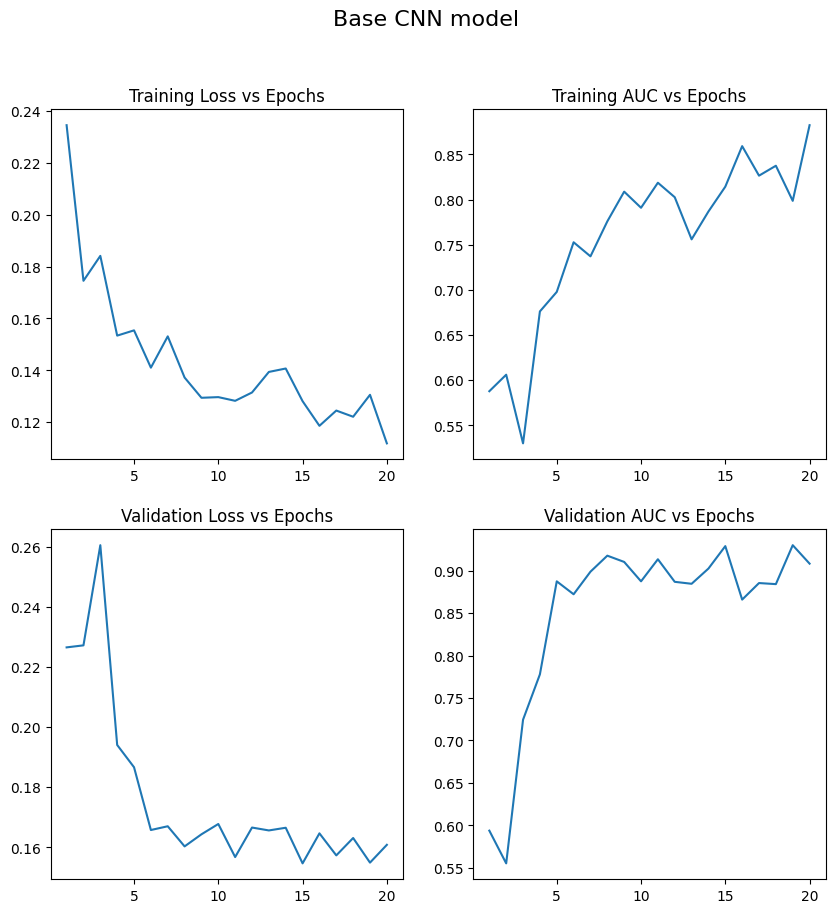

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 21), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('auc'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('val_auc'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training AUC vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation AUC vs Epochs')
fig.suptitle('Base CNN model', size=16)
plt.show()

In [26]:
balanced_data = train_data[(train_data['Label'] == 'Normal') |
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]

balanced_data['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in balanced_data['Label']]

balanced_data_subset_normal = balanced_data[balanced_data['target'] == 'negative']
balanced_data_subset_covid = balanced_data[balanced_data['target'] == 'positive']
balanced_data_frac_normal = balanced_data_subset_normal.sample(frac=(1/5))

balanced_data_concat = pd.concat([balanced_data_frac_normal, balanced_data_subset_covid], axis=0)
balanced_data_concat = shuffle(balanced_data_concat, random_state=0)
balanced_data_train = balanced_data_concat[:240]
balanced_data_validation = balanced_data_concat[240:]

print(f"Balanced train data shape {balanced_data_train.shape}")
print(f"Balanced validation data shape {balanced_data_validation.shape}")

Balanced train data shape (240, 7)
Balanced validation data shape (86, 7)


In [27]:
balanced_train_generator = train_image_generator.flow_from_dataframe(
    dataframe=balanced_data_train,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

balanced_validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=balanced_data_validation,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 240 validated image filenames belonging to 2 classes.
Found 86 validated image filenames belonging to 2 classes.


In [28]:
METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'),
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

balanced_model = Sequential([
    Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


balanced_model.compile(optimizer=Adam(), loss=binary_crossentropy,
             metrics=METRICS)

In [29]:
balanced_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)         

In [30]:
balanced_history = balanced_model.fit_generator(balanced_train_generator,
                                               epochs=30,
                                               validation_data=balanced_validation_generator,
                                               callbacks=[custom_callback])

Epoch 1/30
4/4 [==============================] - 13s 3s/step - loss: 0.6773 - tp: 9.0000 - fp: 56.0000 - tn: 147.0000 - fn: 28.0000 - accuracy: 0.6500 - precision: 0.1385 - recall: 0.2432 - auc: 0.4068 - val_loss: 0.6521 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 65.0000 - val_fn: 21.0000 - val_accuracy: 0.7558 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6575 - lr: 1.0000e-04
Epoch 2/30
4/4 [==============================] - 9s 3s/step - loss: 0.6234 - tp: 4.0000 - fp: 13.0000 - tn: 190.0000 - fn: 33.0000 - accuracy: 0.8083 - precision: 0.2353 - recall: 0.1081 - auc: 0.5762 - val_loss: 0.6117 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 65.0000 - val_fn: 21.0000 - val_accuracy: 0.7558 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6440 - lr: 1.0000e-04
Epoch 3/30
4/4 [==============================] - 9s 3s/step - loss: 0.5803 - tp: 1.0000 - fp: 4.0000 - tn: 199.0000 - fn: 36.0000 - accuracy: 0.8333 - precision: 0.2000 - recall:

In [31]:
balanced_model.save('covid19_xray_base_cnn_model_balanced.h5')
ACCURACY_LIST.append(['Balanced Base Model', balanced_history])

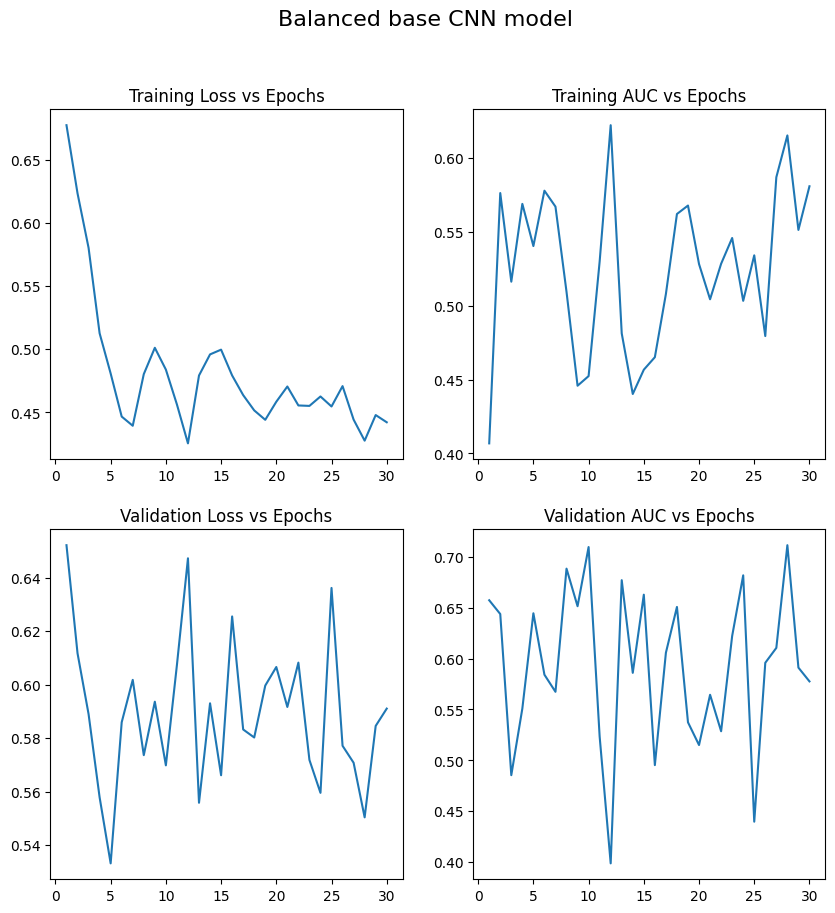

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 31), y=balanced_history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 31), y=balanced_history.history.get('auc'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 31), y=balanced_history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 31), y=balanced_history.history.get('val_auc'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training AUC vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation AUC vs Epochs')
fig.suptitle('Balanced base CNN model', size=16)
plt.show()

In [33]:
METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'),
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

def output_custom_model(prebuilt_model):
    print(f"Processing {prebuilt_model}")
    prebuilt = prebuilt_model(include_top=False,
                            input_shape=(224, 224, 3),
                            weights='imagenet')
    output = prebuilt.output
    output = GlobalMaxPooling2D()(output)
    output = Dense(128, activation='relu')(output)
    output = Dropout(0.2)(output)
    output = Dense(1, activation='sigmoid')(output)

    model = Model(inputs=prebuilt.input, outputs=output)
    model.compile(optimizer='sgd', loss=binary_crossentropy,
              metrics=METRICS)
    return model

In [34]:
resnet_custom_model = output_custom_model(ResNet50)
resnet_history = resnet_custom_model.fit_generator(train_generator,
                                 epochs=20,
                                 validation_data=validation_generator,
                                 callbacks=[custom_callback])

Processing <function ResNet50 at 0x7c66ceb4ad40>
94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/20
125/125 [==============================] - 60s 328ms/step - loss: 0.5814 - tp: 1.0000 - fp: 29.0000 - tn: 936.0000 - fn: 34.0000 - accuracy: 0.9370 - precision: 0.0333 - recall: 0.0286 - auc: 0.4883 - val_loss: 1.1911 - val_tp: 21.0000 - val_fp: 335.0000 - val_tn: 42.0000 - val_fn: 2.0000 - val_accuracy: 0.1575 - val_precision: 0.0590 - val_recall: 0.9130 - val_auc: 0.4933 - lr: 1.0000e-04
Epoch 2/20
125/125 [==============================] - 40s 318ms/step - loss: 0.3740 - tp: 5.0000 - fp: 28.0000 - tn: 937.0000 - fn: 30.0000 - accuracy: 0.9420 - precision: 0.1515 - recall: 0.1429 - auc: 0.6013 - val_loss: 0.8481 - val_tp: 12.0000 - val_fp: 182.0000 - val_tn: 195.0000 - val_fn: 11.0000 - val_accuracy: 0.5175 - val_precision: 0.0619 - val_recall: 0.5217 - val_auc: 0.5004 - lr: 1.0000e-04
Epoch 3/20
125/125 [==============================] - 40s 317ms/step - loss:

In [35]:
resnet_custom_model.save('covid19_xray_resnet_50.h5')
ACCURACY_LIST.append(['ResNet 50', resnet_history])

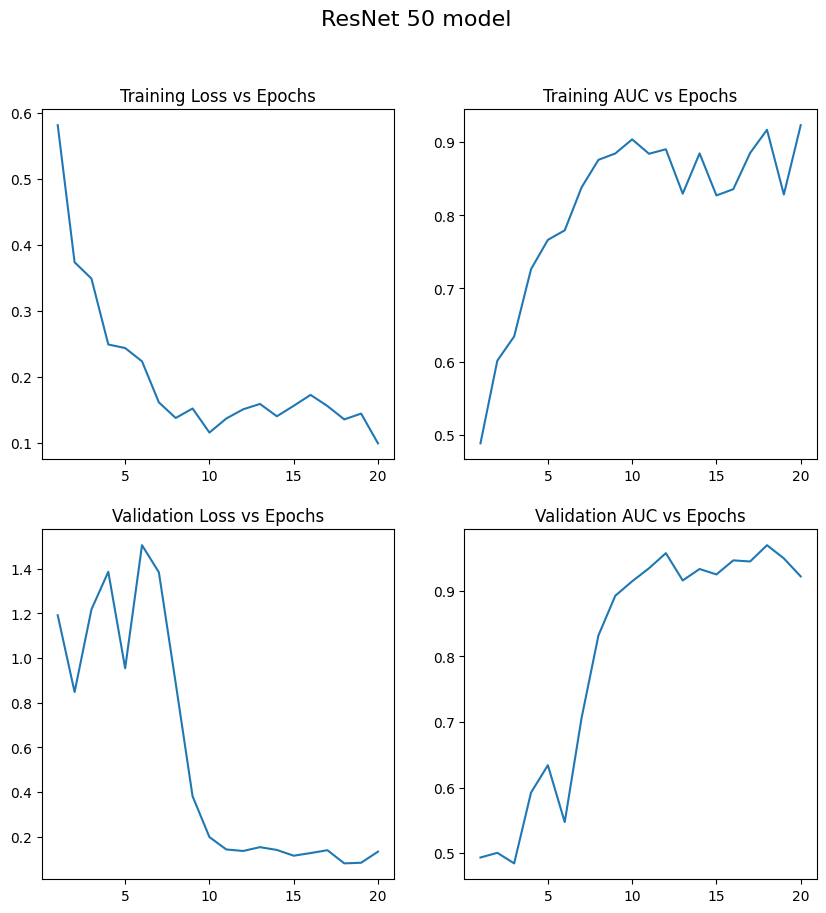

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 21), y=resnet_history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 21), y=resnet_history.history.get('auc'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 21), y=resnet_history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 21), y=resnet_history.history.get('val_auc'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training AUC vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation AUC vs Epochs')
fig.suptitle('ResNet 50 model', size=16)
plt.show()

In [37]:
METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'),
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

efficient_net_custom_model = output_custom_model(EfficientNetB4)
efficient_net_history = efficient_net_custom_model.fit_generator(train_generator,
                                 epochs=20,
                                 validation_data=validation_generator,
                                 callbacks=[custom_callback])

Processing <function EfficientNetB4 at 0x7c66cc8e8430>
71892840/71892840 [==============================] - 4s 0us/step
Epoch 1/20
125/125 [==============================] - 83s 341ms/step - loss: 0.5244 - tp: 8.0000 - fp: 103.0000 - tn: 862.0000 - fn: 27.0000 - accuracy: 0.8700 - precision: 0.0721 - recall: 0.2286 - auc: 0.5600 - val_loss: 0.3041 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 375.0000 - val_fn: 22.0000 - val_accuracy: 0.9400 - val_precision: 0.3333 - val_recall: 0.0435 - val_auc: 0.6031 - lr: 1.0000e-04
Epoch 2/20
125/125 [==============================] - 40s 318ms/step - loss: 0.2563 - tp: 1.0000 - fp: 14.0000 - tn: 951.0000 - fn: 34.0000 - accuracy: 0.9520 - precision: 0.0667 - recall: 0.0286 - auc: 0.5324 - val_loss: 0.3425 - val_tp: 1.0000 - val_fp: 11.0000 - val_tn: 366.0000 - val_fn: 22.0000 - val_accuracy: 0.9175 - val_precision: 0.0833 - val_recall: 0.0435 - val_auc: 0.4884 - lr: 1.0000e-04
Epoch 3/20
125/125 [==============================] - 40s 318ms/step - l

In [38]:
efficient_net_custom_model.save('covid19_xray_efficient_net_B4.h5')
ACCURACY_LIST.append(['EfficientNet B4', efficient_net_history])

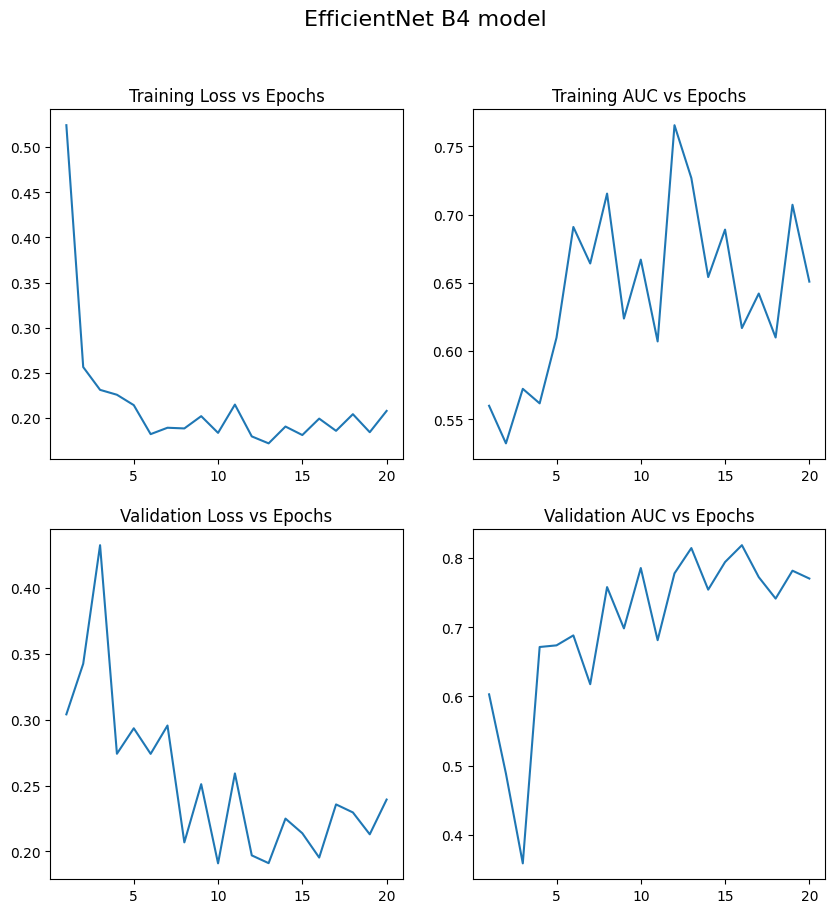

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 21), y=efficient_net_history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 21), y=efficient_net_history.history.get('auc'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 21), y=efficient_net_history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 21), y=efficient_net_history.history.get('val_auc'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training AUC vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation AUC vs Epochs')
fig.suptitle('EfficientNet B4 model', size=16)
plt.show()

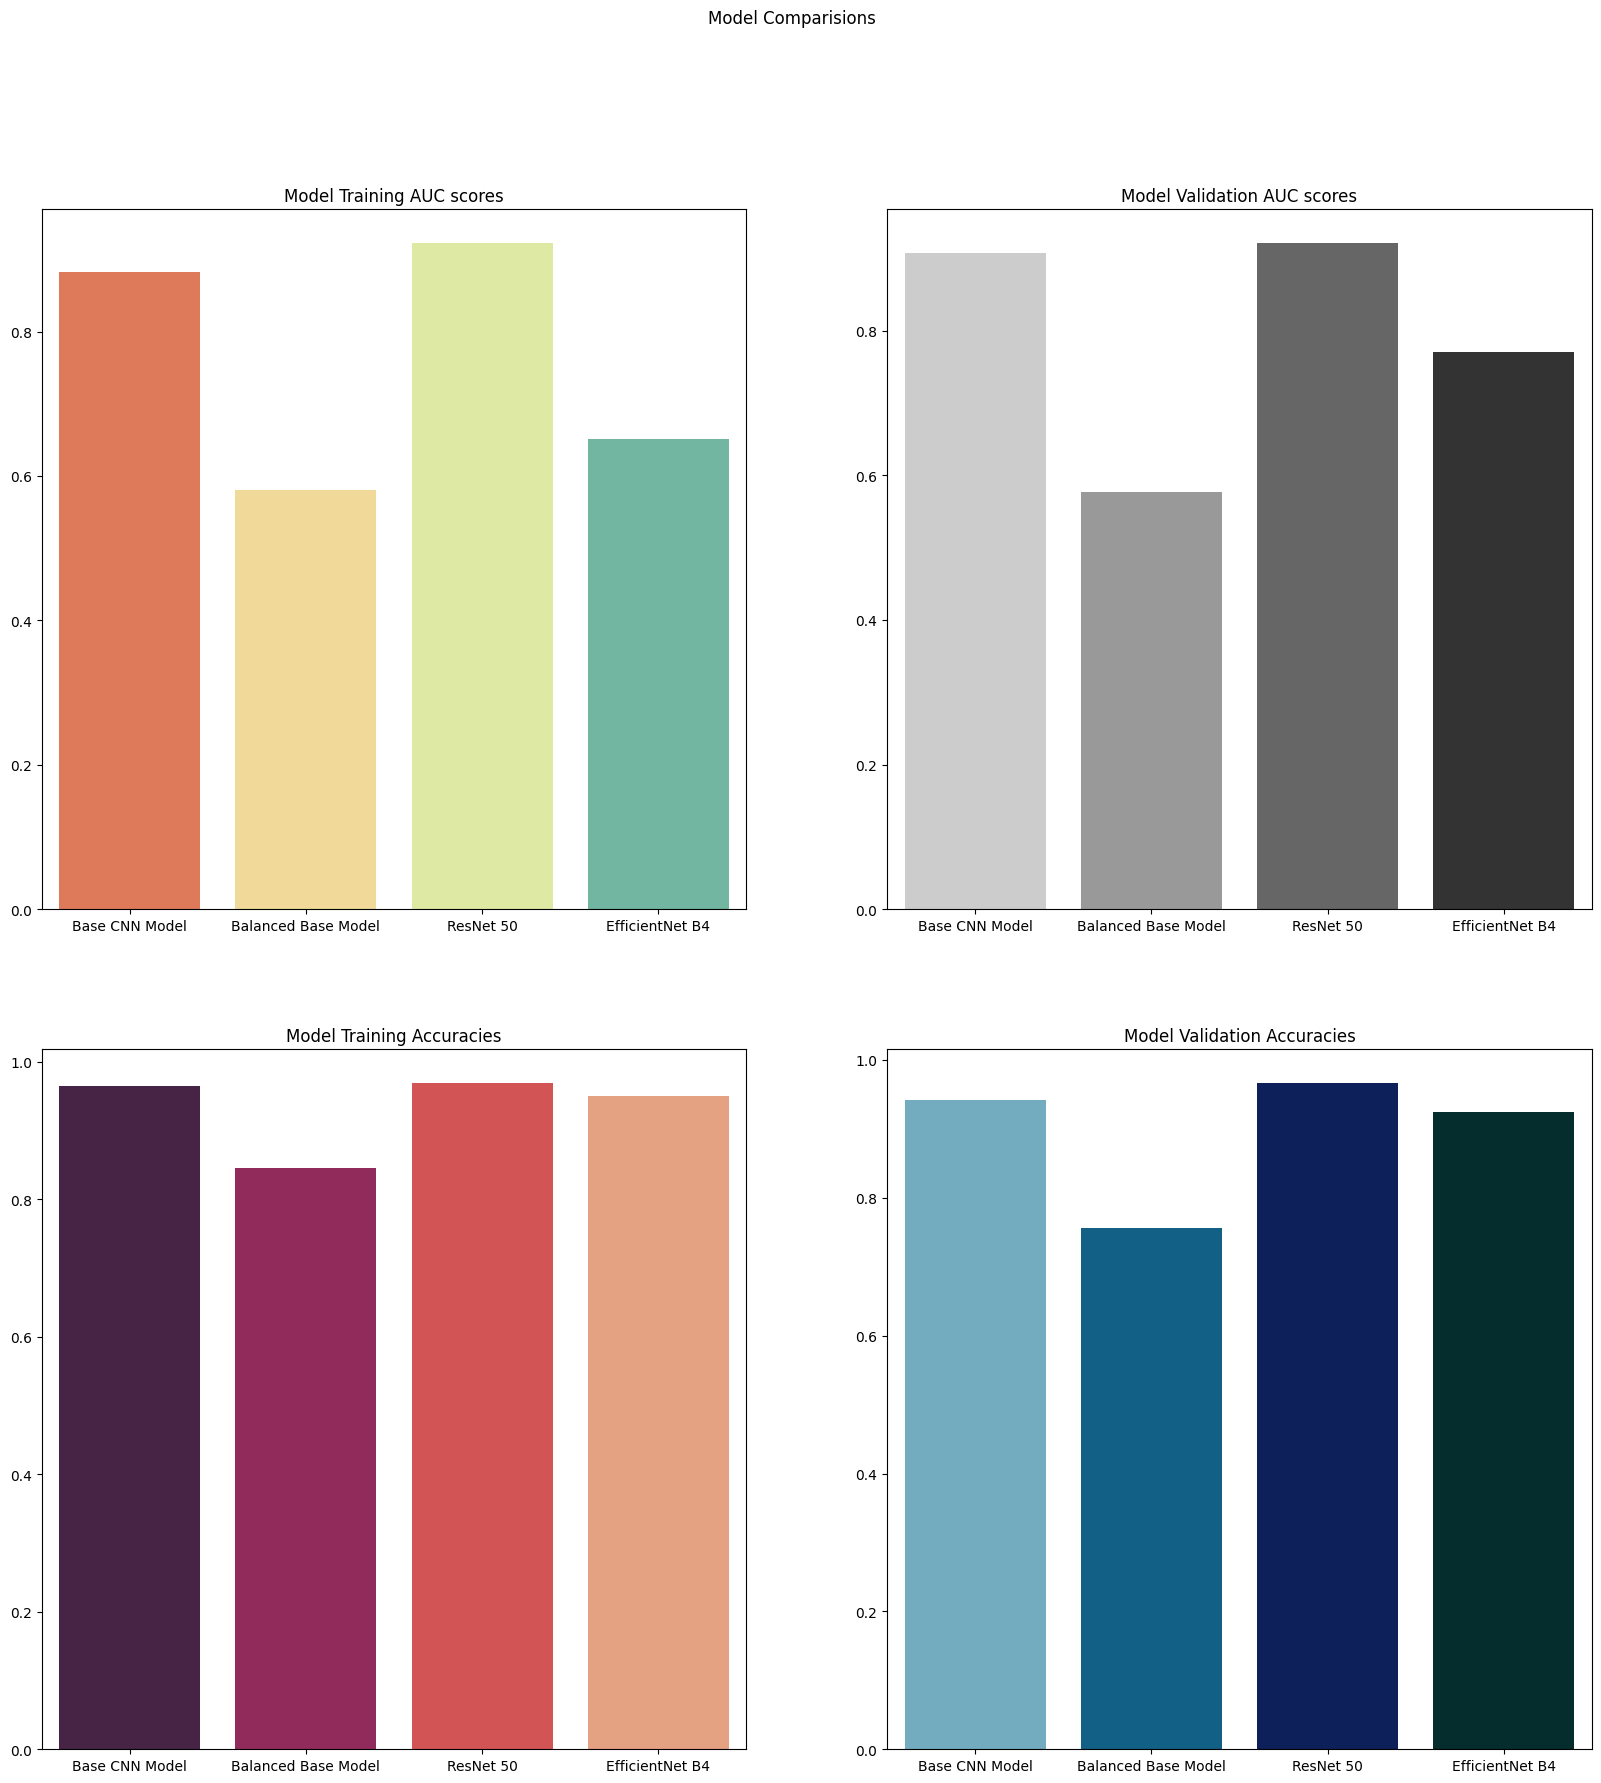

In [40]:
ACCURACY_LIST = np.array(ACCURACY_LIST)
model_names = ACCURACY_LIST[:, 0]
histories = ACCURACY_LIST[:, 1]

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.barplot(x=model_names, y=list(map(lambda x: x.history.get('auc')[-1], histories)), ax=ax[0, 0], palette='Spectral')
sns.barplot(x=model_names, y=list(map(lambda x: x.history.get('val_auc')[-1], histories)), ax=ax[0, 1], palette='gist_yarg')
sns.barplot(x=model_names, y=list(map(lambda x: x.history.get('accuracy')[-1], histories)), ax=ax[1, 0], palette='rocket')
sns.barplot(x=model_names, y=list(map(lambda x: x.history.get('val_accuracy')[-1], histories)), ax=ax[1, 1], palette='ocean_r')
ax[0, 0].set_title('Model Training AUC scores')
ax[0, 1].set_title('Model Validation AUC scores')
ax[1, 0].set_title('Model Training Accuracies')
ax[1, 1].set_title('Model Validation Accuracies')
fig.suptitle('Model Comparisions')
plt.show()

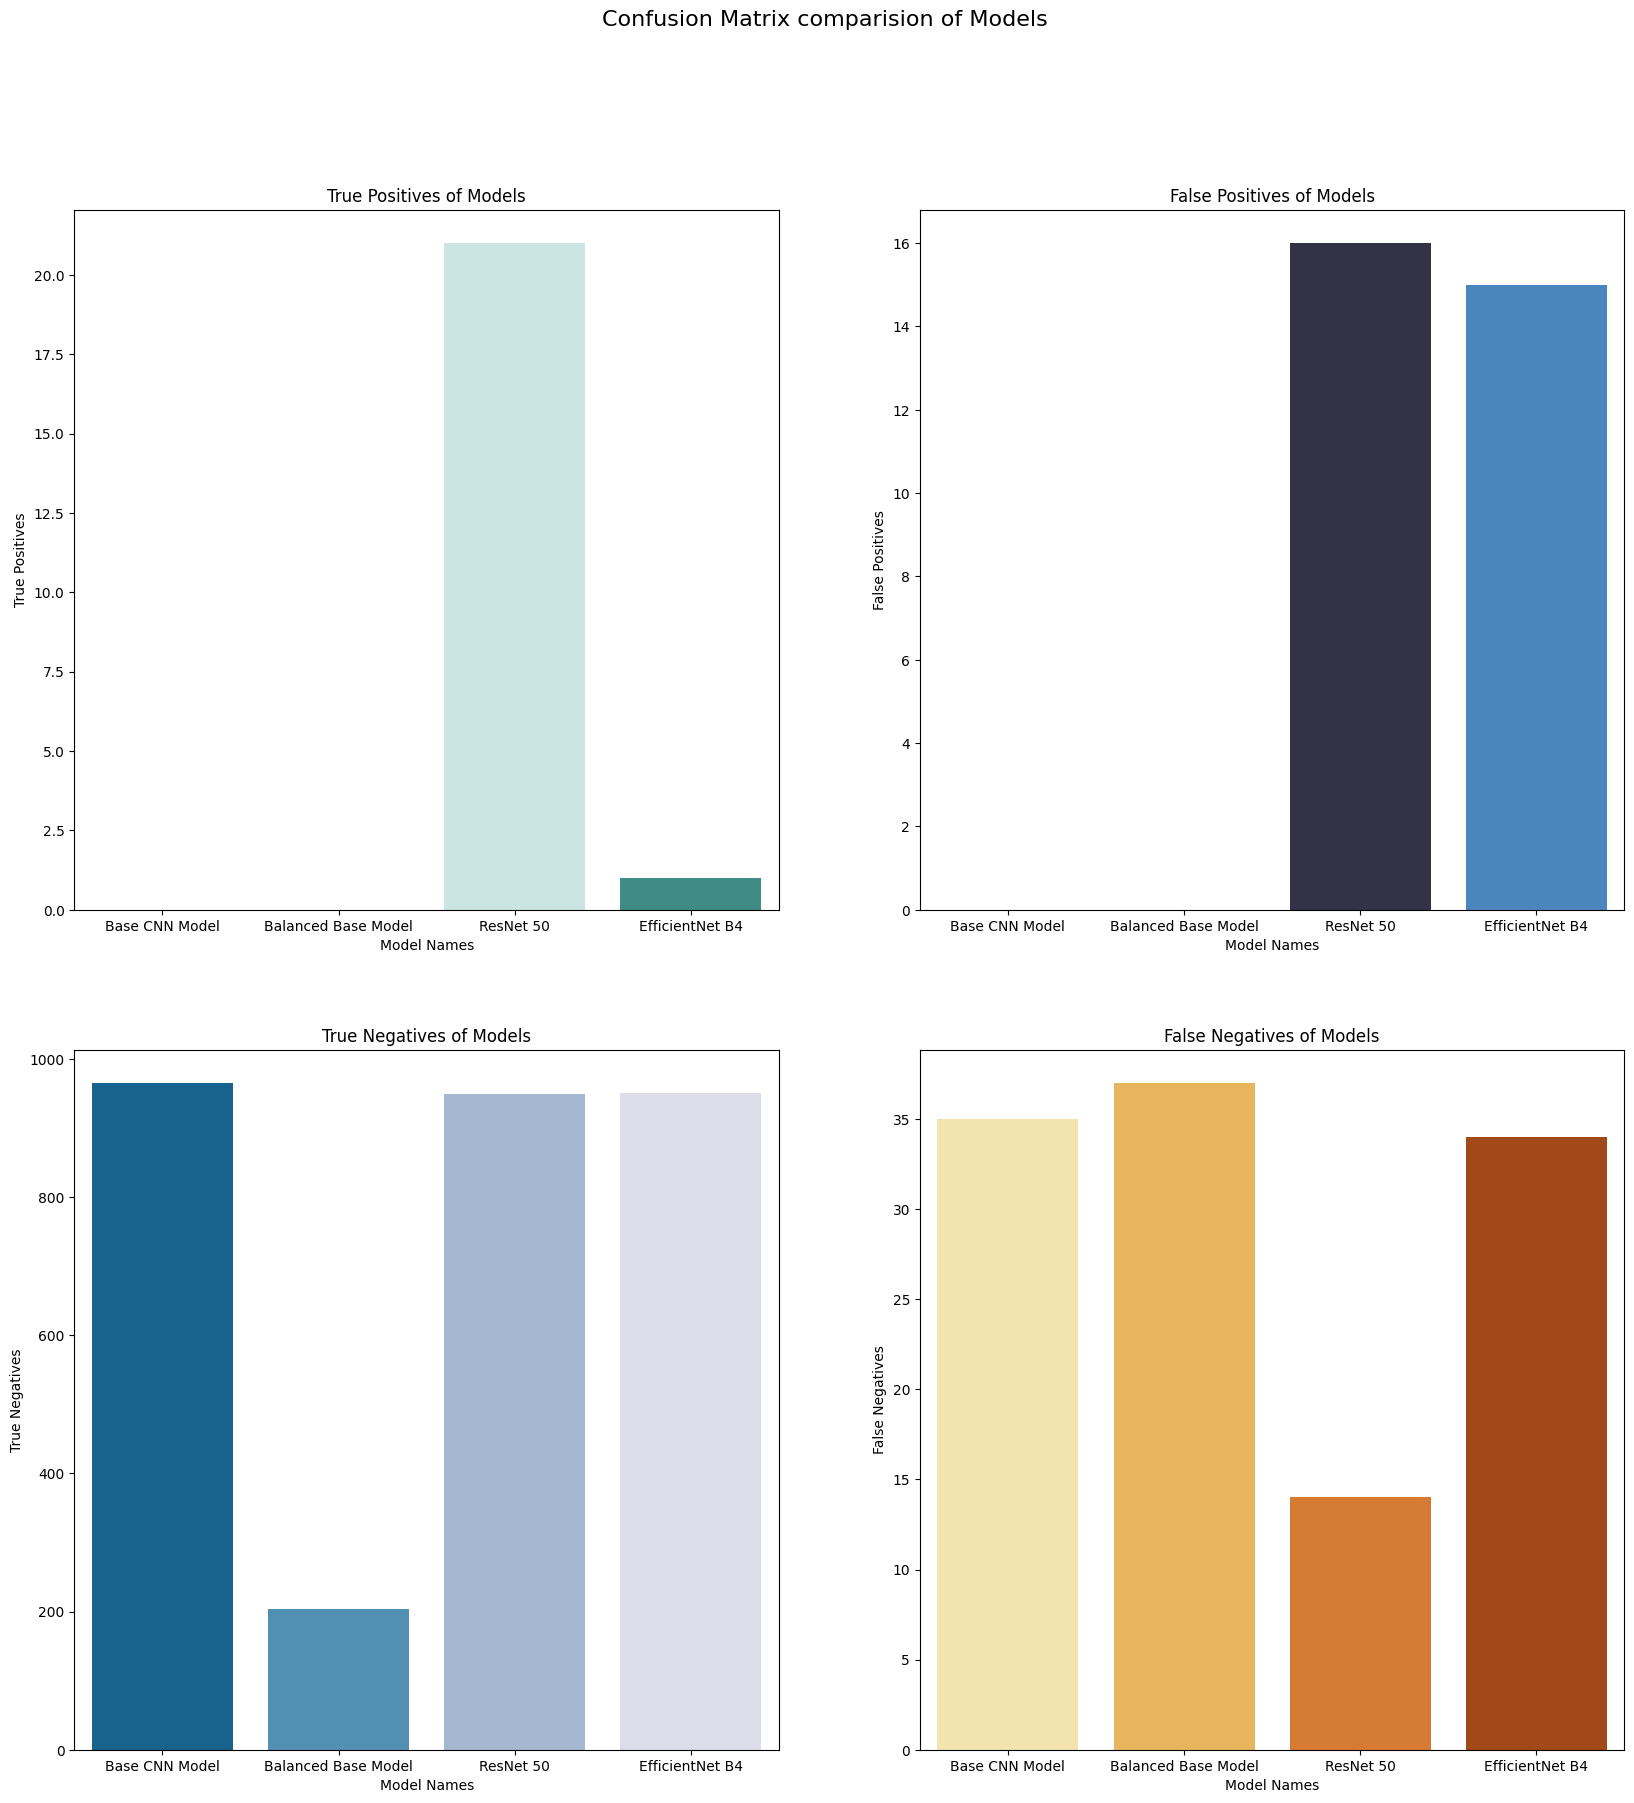

In [41]:
metric_dataframe = pd.DataFrame({
    'Model Names': model_names,
    'True Positives': list(map(lambda x: x.history.get('tp')[-1], histories)),
    'False Positives': list(map(lambda x: x.history.get('fp')[-1], histories)),
    'True Negatives': list(map(lambda x: x.history.get('tn')[-1], histories)),
    'False Negatives': list(map(lambda x: x.history.get('fn')[-1], histories))
})
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.barplot(x='Model Names', y='True Positives', data=metric_dataframe, ax=ax[0, 0], palette='BrBG')
sns.barplot(x='Model Names', y='False Positives', data=metric_dataframe, ax=ax[0, 1], palette='icefire_r')
sns.barplot(x='Model Names', y='True Negatives', data=metric_dataframe, ax=ax[1, 0], palette='PuBu_r')
sns.barplot(x='Model Names', y='False Negatives', data=metric_dataframe, ax=ax[1, 1], palette='YlOrBr')
ax[0, 0].set_title('True Positives of Models')
ax[0, 1].set_title('False Positives of Models')
ax[1, 0].set_title('True Negatives of Models')
ax[1, 1].set_title('False Negatives of Models')
fig.suptitle('Confusion Matrix comparision of Models', size=16)
plt.show()